# Moving Average (MA)

In [6]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
plt.style.use('fivethirtyeight')

In [7]:
from sklearn.metrics import mean_squared_error

def calculate_rmse(y_true, y_pred):
    """
    Calculate the Root Mean Squared Error (RMSE)  
    """ 
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [8]:
stock_cleaned_data=pd.read_csv('../data/stock_cleaned_data.csv', index_col = 0)
stock_cleaned_data.head()

,open,high,low,close,adjclose,volume
date,,,,,,
1999-11-01,136.500000,137.000000,135.562500,135.562500,88.217185,4006500
1999-11-02,135.968704,137.250000,134.593704,134.593704,87.586742,6516900
1999-11-03,136.000000,136.375000,135.125000,135.500000,88.176513,7222300
1999-11-04,136.750000,137.359299,135.765594,136.531204,88.847568,7907500
1999-11-05,138.625000,139.109299,136.781204,137.875000,89.722043,7431500


In [9]:
data=stock_cleaned_data.filter(['close'])
dataset=data.values

test_data_len=len(dataset)-math.ceil(len(dataset)*.8)
print("testing data size:", test_data_len)
test_data = dataset[-test_data_len:, : ]

testing data size: 1180


In [10]:
def MA(dataset, test_length, window_size):
    MA_pred = []
    if len(dataset) < test_length + window_size + 1:
        return [np.mean(dataset[:i]) for i in range(1, len(dataset) + 1)]
    test_data = dataset[-test_length:, :]

    for i in range(test_length, 0, -1):
        MA_pred.append(np.mean(dataset[(-i - window_size):(-i)]))
    
    return MA_pred

In [11]:
grid = [5, 10, 50 ,100 ,200]

In [12]:
for windowsize in grid:
    print(f"RMSE of window size {windowsize}\t:", calculate_rmse(test_data, MA(dataset, test_data_len, windowsize)))

RMSE of window size 5	: 6.472304591782865
RMSE of window size 10	: 8.397305149847842
RMSE of window size 50	: 16.63162171227357
RMSE of window size 100	: 21.423585974507596
RMSE of window size 200	: 30.66496767244235


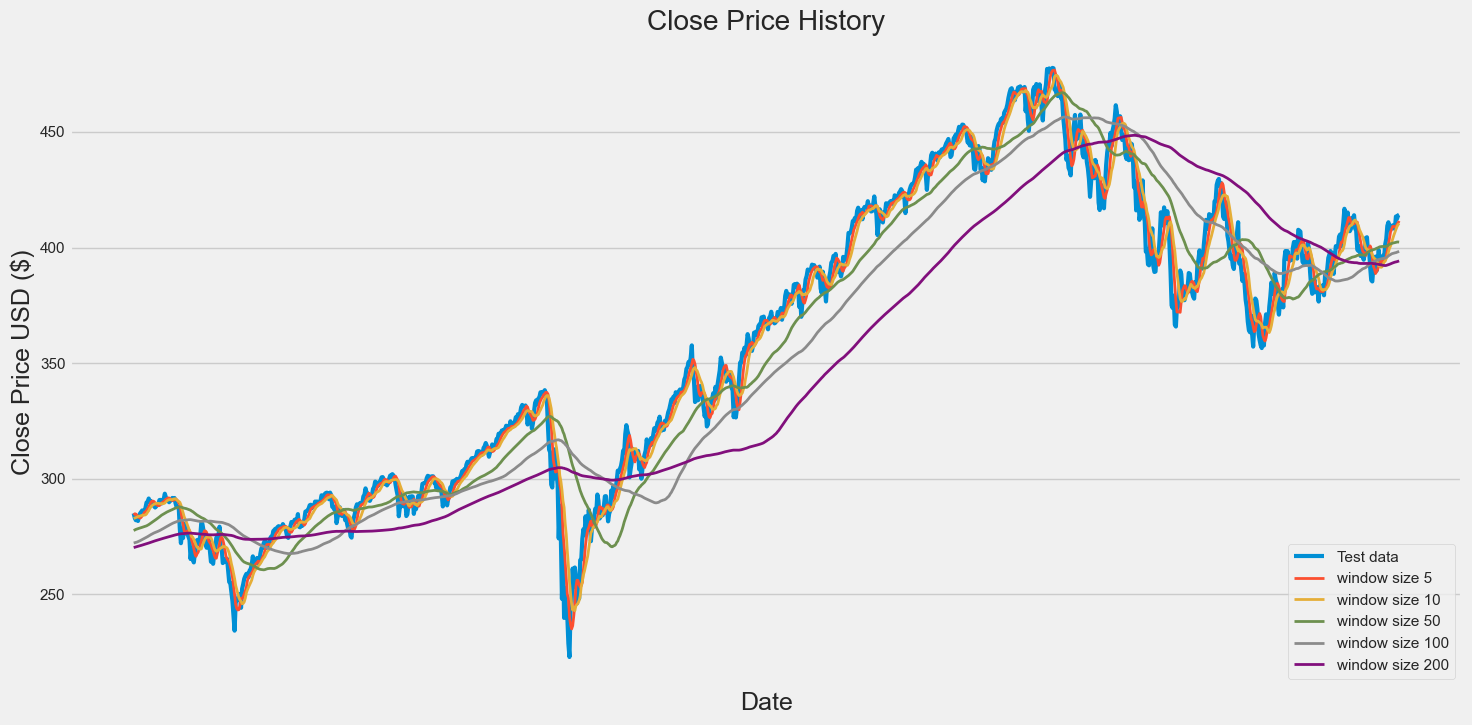

In [13]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(test_data, linewidth=3)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
legend = ['Test data']

for windowsize in grid:
    plt.plot(MA(dataset,test_data_len, windowsize), linewidth=2)
    legend.append(f"window size {windowsize}")
plt.legend(legend,loc='lower right')
plt.xticks([])
plt.show()